In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
df = pd.read_csv('19.2.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
# Dropping unnecessary columns 
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [7]:
# Visualization
import seaborn as sns

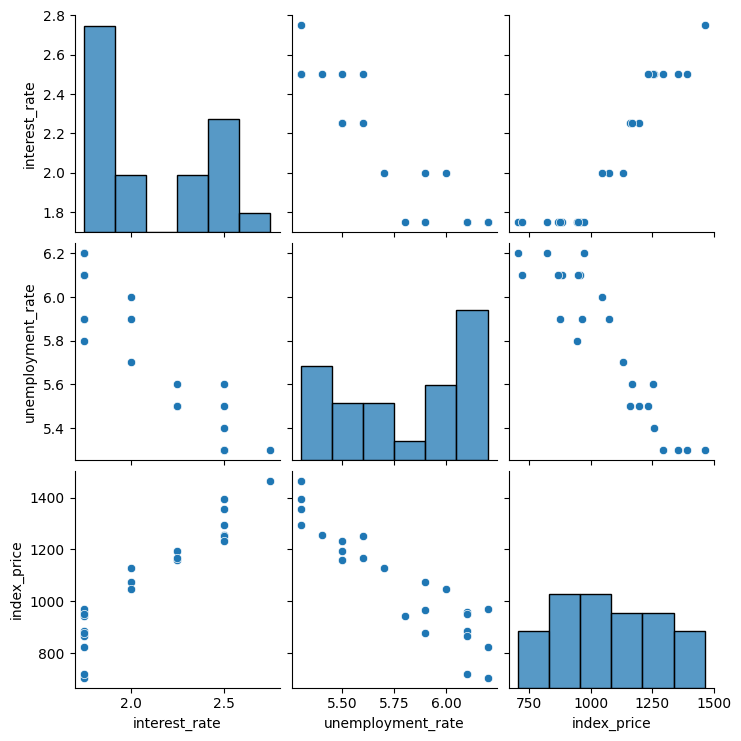

In [8]:
sns.pairplot(data=df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

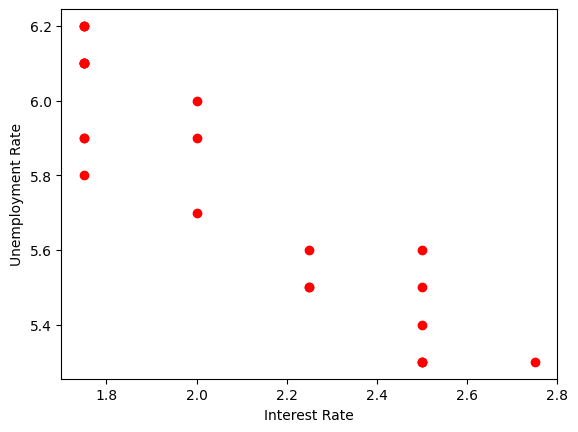

In [12]:
plt.scatter(data=df, x='interest_rate', y='unemployment_rate', color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [13]:
X = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

In [14]:
print(X.head())
print(y.head())

   interest_rate  unemployment_rate
0           2.75                5.3
1           2.50                5.3
2           2.50                5.3
3           2.50                5.3
4           2.50                5.4
0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

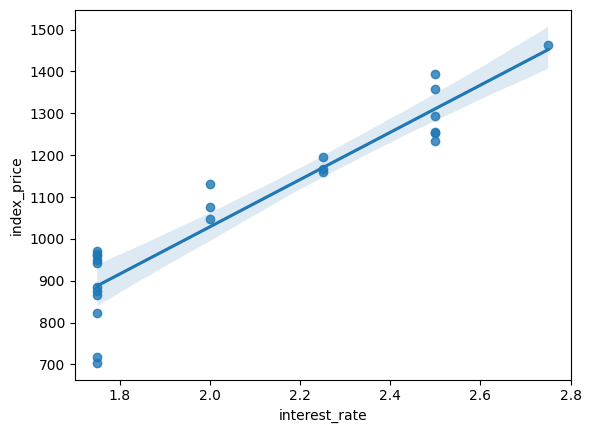

In [17]:
sns.regplot(data=df, x='interest_rate', y='index_price')

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

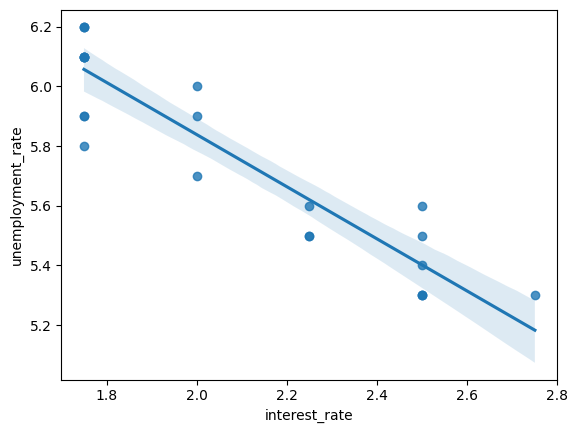

In [19]:
sns.regplot(data=df, x='interest_rate', y='unemployment_rate')

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

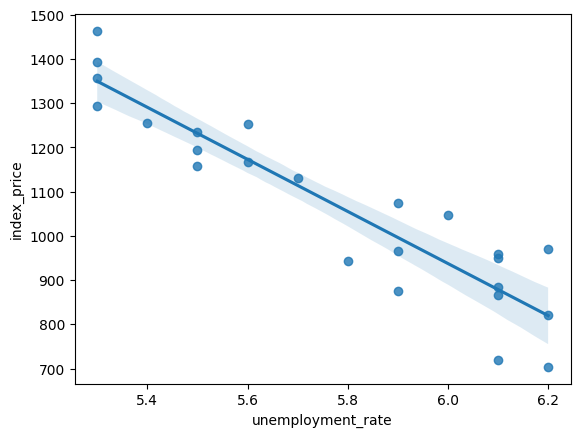

In [20]:
sns.regplot(data=df, x='unemployment_rate', y='index_price')

In [21]:
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [23]:
X_train_scaled

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [24]:
X_test_scaled

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
from sklearn.model_selection import cross_val_score

In [31]:
# Cross-validation
validation = cross_val_score(estimator=model, X=X_train_scaled, y=y_train, scoring='neg_mean_squared_error', cv=3)

In [32]:
validation

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [33]:
np.mean(validation)

np.float64(-5914.828180162386)

In [40]:
y_pred = model.predict(X_test_scaled)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [41]:
# Performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [42]:
r_squared = r2_score(y_test, y_pred)
print(r_squared)
adjusted_r2 = 1 - (1 - r_squared) * (len(y_test)-1)/(len(y_test) - X_test_scaled.shape[1]-1)
print(adjusted_r2)

0.7591371539010257
0.5985619231683761


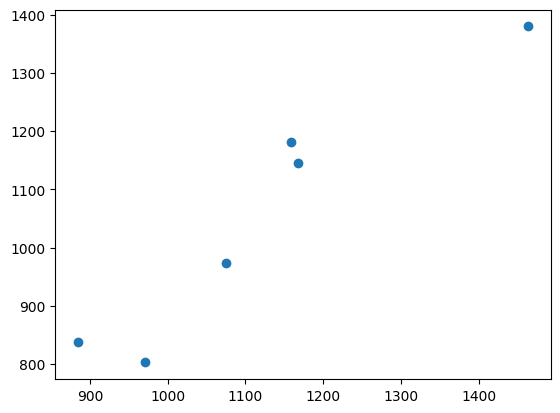

In [43]:
# Assumption
plt.scatter(y_test, y_pred)

In [44]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


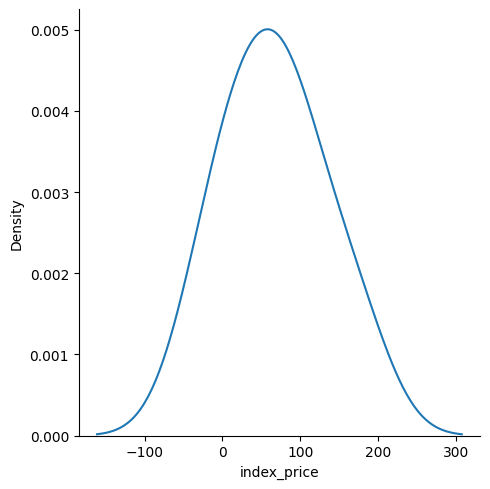

In [46]:
sns.displot(residuals, kind='kde')

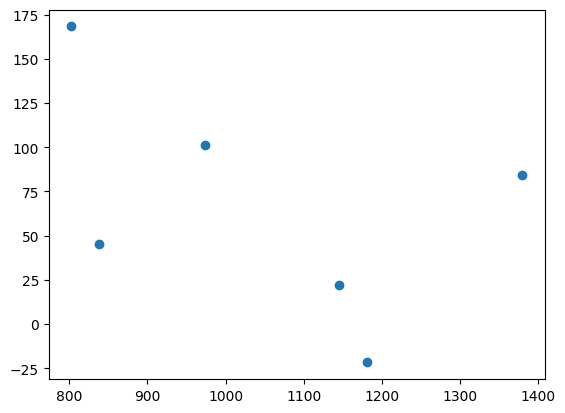

In [47]:
# scatter plot wrt prediction and residuals
plt.scatter(y_pred, residuals)

In [48]:
print(model.coef_)

[  88.27275507 -116.25716066]


In [49]:
print(model.intercept_)

1053.4444444444443
